## <div align="center"> TUGAS LAB IF540 MACHINE LEARNING </div>
### <div align="center"> WEEK [12] : [REINFORCEMENT LEARNING] </div>

#### <div align="center"> Semester Ganjil 2023/2024 </div>

In [ ]:
import datetime
import uuid

# Fill in your name and NIM
myName = "Steven Indriano"
myNIM = "57217"

myDate = datetime.datetime.now()
myDevice = str(uuid.uuid1())

# Header
print("Name: \t\t{}".format(myName))
print("NIM: \t\t{}".format(myNIM))
print("Start: \t\t{}".format(myDate))
print("Device ID: \t{}".format(myDevice))

Name: 		Steven Indriano
NIM: 		57217
Start: 		2023-11-27 15:20:04.153803
Device ID: 	7094a9f0-8d38-11ee-8327-0242ac1c000c



---

### Dataset yang dipakai:

1. [Nama dataset1] – sumber : [cantumkan link dataset]
2. [Nama dataset2] – sumber : [cantumkan link dataset]

### Hasil kerja

In [ ]:
!pip install gym

In [ ]:
import gym
import itertools
import matplotlib
import matplotlib.style
import numpy as np
import pandas as pd
import sys

In [ ]:
env = WindyGridworldEnv()

In [ ]:
from collections import defaultdict
from windy_gridworld import WindyGridworldEnv
import plotting

matplotlib.style.use('ggplot')

In [ ]:
def createEpsilonGreedyPolicy(Q, epsilon, num_actions):
    def policyFunction(state):

        Action_probabilities = np.ones(num_actions,
                                      dtype = float) * epsilon / num_actions

        best_action = np.argmax(Q[state])
        Action_probabilities[best_action] += (1.0 - epsilon)
        return Action_probabilities

    return policyFunction

In [ ]:
def qLearning(env, num_episodes, discount_factor = 1.0,
             alpha = 0.6, epsilon = 0.1):

    Q = defaultdict(lambda: np.zeros(env.action_space.n))

    stats = plotting.EpisodeStats(
    episode_lengths = np.zeros(num_episodes),
    episode_rewards = np.zeros(num_episodes))

    policy = createEpsilonGreedyPolicy(Q, epsilon, env.action_space.n)

    for ith_episode in range(num_episodes):

        state = env.reset()

        for t in itertools.count():

            action_probabilities = policy(state)

            action = np.random.choice(np.arange(
            len(action_probabilities)),
            p = action_probabilities)

            next_state, reward, done, _ = env.step(action)

            stats.episode_rewards[ith_episode] += reward
            stats.episode_lengths[ith_episode] = t

            best_next_action = np.argmax(Q[next_state])
            td_target = reward + discount_factor * Q[next_state][best_next_action]
            td_delta = td_target - Q[state][action]
            Q[state] [action] += alpha * td_delta

            if done:
                break
            state = next_state

    return Q, stats

In [ ]:
Q, stats = qLearning(env, 1000)

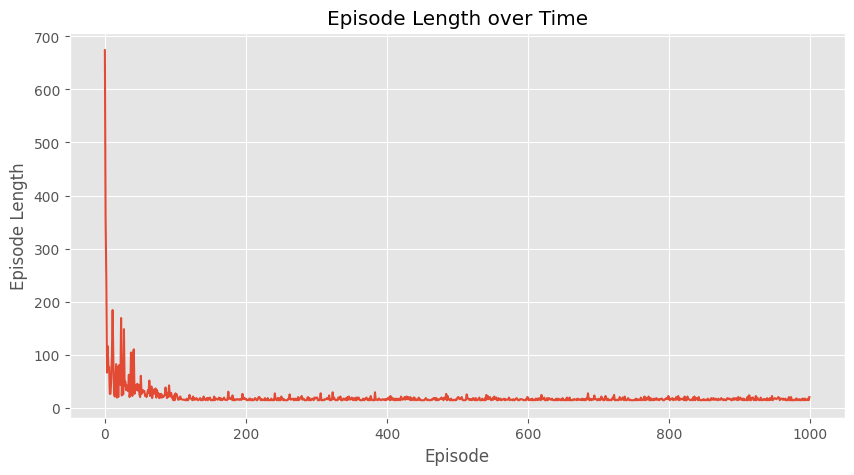

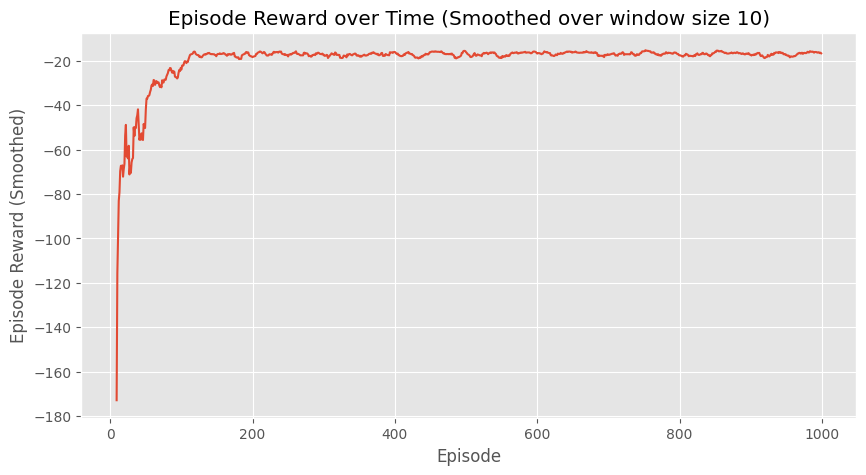

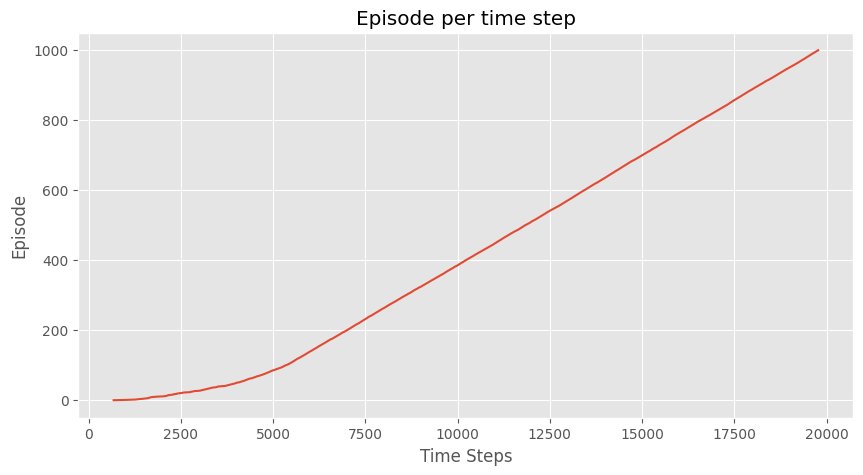

(<Figure size 1000x500 with 1 Axes>,
 <Figure size 1000x500 with 1 Axes>,
 <Figure size 1000x500 with 1 Axes>)

In [ ]:
plotting.plot_episode_stats(stats)

In [ ]:
import numpy as np
import pylab as pl
import networkx as nx

In [ ]:
edges = [(0, 1), (1, 5), (5, 6), (5, 4), (1, 2),
        (1, 3), (9, 10), (2, 4), (0, 6), (6, 7),
        (8, 9), (7, 8), (1, 7), (3, 9)]

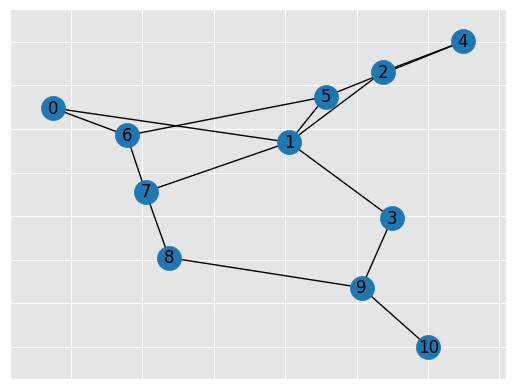

In [ ]:
goal = 10
G = nx.Graph()
G.add_edges_from(edges)
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos)
nx.draw_networkx_edges(G, pos)
nx.draw_networkx_labels(G, pos)
pl.show()

In [ ]:
MATRIX_SIZE = 11
M = np.matrix(np.ones(shape = (MATRIX_SIZE, MATRIX_SIZE)))
M *= -1

for point in edges:
    print(point)
    if point[1] == goal:
        M[point] = 100
    else:
        M[point] = 0
    if point[0] == goal:
        M[point[::-1]] = 100
    else:
        M[point[::-1]] = 0

M[goal, goal] = 100
print(M)

(0, 1)
(1, 5)
(5, 6)
(5, 4)
(1, 2)
(1, 3)
(9, 10)
(2, 4)
(0, 6)
(6, 7)
(8, 9)
(7, 8)
(1, 7)
(3, 9)
[[ -1.   0.  -1.  -1.  -1.  -1.   0.  -1.  -1.  -1.  -1.]
 [  0.  -1.   0.   0.  -1.   0.  -1.   0.  -1.  -1.  -1.]
 [ -1.   0.  -1.  -1.   0.  -1.  -1.  -1.  -1.  -1.  -1.]
 [ -1.   0.  -1.  -1.  -1.  -1.  -1.  -1.  -1.   0.  -1.]
 [ -1.  -1.   0.  -1.  -1.   0.  -1.  -1.  -1.  -1.  -1.]
 [ -1.   0.  -1.  -1.   0.  -1.   0.  -1.  -1.  -1.  -1.]
 [  0.  -1.  -1.  -1.  -1.   0.  -1.   0.  -1.  -1.  -1.]
 [ -1.   0.  -1.  -1.  -1.  -1.   0.  -1.   0.  -1.  -1.]
 [ -1.  -1.  -1.  -1.  -1.  -1.  -1.   0.  -1.   0.  -1.]
 [ -1.  -1.  -1.   0.  -1.  -1.  -1.  -1.   0.  -1. 100.]
 [ -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.   0. 100.]]


In [ ]:
Q = np.matrix(np.zeros([MATRIX_SIZE, MATRIX_SIZE]))

gamma = 0.75
initial_state = 1

In [ ]:
def available_actions(state):
  current_state_row = M[state, ]
  available_action = np.where(current_state_row >= 0) [1]
  return available_action

available_action = available_actions(initial_state)

In [ ]:
def sample_next_action(available_actions_range):
  next_action = int(np.random.choice(available_action, 1))
  return next_action

action = sample_next_action(available_action)

In [ ]:
def update(current_state, action, gamma):
    max_index = np.where(Q[action, ] == np.max(Q[action, ]))[1]

    if max_index.shape[0] > 1:
        max_index = np.random.choice(max_index, size=1)  # Randomly choose one index
    else:
        max_index = int(max_index)

    max_value = Q[action, max_index]
    Q[current_state, action] = M[current_state, action] + gamma * max_value

    if (np.max(Q) > 0):
        return(np.sum(Q / np.max(Q) * 100))
    else:
        return (0)

In [ ]:
update(initial_state, action, gamma)

0

In [ ]:
scores = []
for i in range(1000):
  current_state = np.random.randint(0, int(Q.shape[0]))
  avaiilable_action = available_actions(current_state)
  action = sample_next_action(available_action)
  score = update(current_state, action, gamma)
  scores.append(score)

In [ ]:
current_state = 0
steps = [current_state]

while current_state != 10:
    next_step_index = np.where(Q[current_state,] == np.max(Q[current_state,]))[1]

    if next_step_index[0] > 1:
        next_step_index = int(np.random.choice(next_step_index, size=1))
    else:
        next_step_index = int(next_step_index)
    steps.append(next_step_index)
    current_state = next_step_index

print("Most efficient path: ")
print(steps)

pl.plot(scores)
pl.xlabel("No. of iterations")
pl.ylabel("Reward gained")
pl.show()

TypeError: ignored

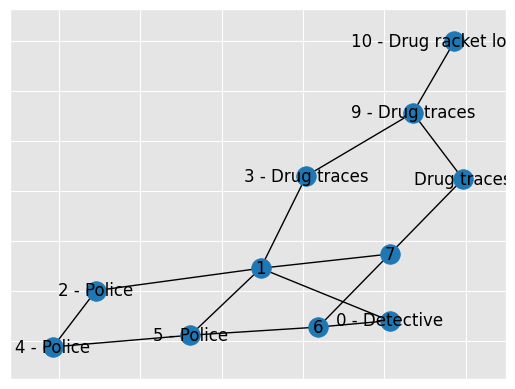

In [ ]:
police = [2, 4, 5]
drug_traces = [3, 8,9]

G = nx.Graph()
G.add_edges_from(edges)

mapping = {
    0: '0 - Detective',
    1: '1',
    2: '2 - Police',
    3: '3 - Drug traces',
    4: '4 - Police',
    5: '5 - Police',
    6: '6',
    7: '7',
    8: 'Drug traces',
    9: '9 - Drug traces',
    10: '10 - Drug racket location'
}


H = nx.relabel_nodes(G, mapping)
pos = nx.spring_layout(H)
nx.draw_networkx_nodes(H, pos, node_size =[200])
nx.draw_networkx_edges(H, pos)
nx.draw_networkx_labels(H, pos)
pl.show()

In [ ]:
Q = np.matrix(np.zeros([MATRIX_SIZE, MATRIX_SIZE]))
env_police = np.matrix(np.zeros([MATRIX_SIZE, MATRIX_SIZE]))
env_drugs = np.matrix(np.zeros([MATRIX_SIZE, MATRIX_SIZE]))
initial_state = 1

In [ ]:
def available_actions(state):
  current_state_row = M[state, ]
  av_action = np.where(current_state_row >= 0) [1]
  return av_action

In [ ]:
def sample_next_action(available_actions_range):
    next_action = int(np.random.choice(available_action, 1))
    return next_action

In [ ]:
def collect_environmental_data(action):
    found = []
    if action in police:
      found.append('p')
    if action in drug_traces:
      found.append('d')
    return (found)

available_action = available_actions(initial_state)
action - sample_next_action(available_action)

0

In [ ]:
def update(current_state, action, gamma):
  max_index = np.where(Q[action, ] == np.max(Q[action, ])) [1]
  if max_index.shape[0] > 1:
    max_index = int(np.random.choice(max_index, size = 1))
  else:
    max_index = int(max_index)
  max_value = Q[action, max_index]
  Q[current_state, action] = M[current_state, action] + gamma * max_value
  environment = collect_environmental_data(action)
  if 'p' in environment:
    env_police[current_state, action] += 1
  if 'd' in environment:
    env_drugs[current_state, action] += 1
  if (np.max(Q) > 0):
    return(np.sum(Q / np.max(Q)*100))
  else:
    return (0)
  update(initial_state, action, gamma)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
def available_actions_with_env_help(state):
  current_state_row = M[state, ]
  av_action = np.where(current_state_row >= 0) [1]

  env_pos_row = env_matrix_snap[state, av_action]

  if(np.sum(env_pos_row < 0)):
    temp_av_action = av_action[np.array(env_pos_row)[0]>= 0]
    if len(temp_av_action) > 0:
        av_action = temp_av_action
  return av_action

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
scores = []
for i in range(1000):
    current_state = np.random.randint(0, int(Q.shape[0]))
    available_action = available_actions(current_state)
    action = sample_next_action(available_action)
    score = update(current_state, action, gamma)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
print('Police Found')
print(env_police)
print('Drug traces Found')
print(env_drugs)

Police Found
[[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0. 18.  0.  0. 18.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0. 43.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0. 55.  0.  0. 36.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0. 48.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0. 21.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]]
Drug traces Found
[[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0. 23.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0. 45.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0. 33.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0. 38.  0.]
 [ 0.  0.  0. 34.  0.  0.  0

In [ ]:
import gym
env = gym.make("Taxi-v3", render_mode="ansi").env
env.reset()
print(env.render())

['+---------+\n|R: |\x1b \x1b: :\x1bG\x1b|\n| : | : : |\n| : : : : |\n| | : | : |\n|Y| : |\x1bB\x1b: |\n+---------+\n\n']


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(


In [ ]:
env.reset()
env.render()

print("Action Space {}".format(env.action_space))
print("State Space {}".format(env.observation_space))

Action Space Discrete(6)
State Space Discrete(500)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
state = env.encode(3, 1, 2, 0)
print("State:", state)

env.s = state
env.render()

State: 328


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[]

In [ ]:
env.P[328]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


{0: [(1.0, 428, -1, False)],
 1: [(1.0, 228, -1, False)],
 2: [(1.0, 348, -1, False)],
 3: [(1.0, 328, -1, False)],
 4: [(1.0, 328, -10, False)],
 5: [(1.0, 328, -10, False)]}

In [ ]:
import numpy as np
import gym

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
env = gym.make('FrozenLake-v0')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/gym/envs/registration.py:593: UserWarning: WARN: The environment FrozenLake-v0 is out of date. You should consider upgrading to version `v1`.
  logger.warn(


DeprecatedEnv: ignored

In [ ]:
epsilon = 0.9
total_episodes = 10000
max_steps = 100
alpha = 0.85
gamma = 0.95

Q = np.zeros((env.observation_space.n, env.action_space.n))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
def choose_action(state):
  action=0
  if np.random.uniform(0, 1) < epsilon:
    action = env.action_space.sample()
  else:
    action = np.argmax(Q[state, :])
  return action

def update(state, state2, reward, action, action2):
  predict = Q[state, action]
  target = reward + gamma * Q[state2, action2]
  Q[state, action] = Q[state, action] +alpha * (target - predict)

In [ ]:
reward=0

for episode in range(total_episodes):
  t = 0
  state1 = env.reset()
  action1 = choose_action(state1)

  while t < max_steps:
    env.render()

    state2, reward, done, info = env.step(action1)
    action2 = choose_action(state2)
    update(state1, state2, reward, action1, action2)

    state1 = state2
    aciton1 = action2

    t += 1
    reward += 1

    if done:
      break

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


KeyboardInterrupt: ignored

In [ ]:
print("Performance: ", reward/total_episodes)
print(Q)

Performance:  -0.001
[[  0.           0.           0.           0.           0.
    0.        ]
 [-15.75907122  -9.27016255  -0.85        -1.12650313   0.
  -11.32421388]
 [ -1.76683125  -3.83014749  -0.85       -23.00873864   0.
  -27.2554008 ]
 ...
 [  0.           0.           0.           0.           0.
    0.        ]
 [  0.           0.           0.           0.           0.
    0.        ]
 [  0.           0.           0.           0.           0.
    0.        ]]


### Kesimpulan



Berikan simpulan yang dilakukan dari hasil kerja menggunakan algoritma dan 2 dataset yang
dipilih. Simpulan bisa berkisar antara (bisa di modifikasi):

    - Simpulan perbandingan dataset
    - Hasil akurasi yang diberikan (jika ada dalam modul)
    - Hasil perbandingan akurasi antara algoritma (jika ada dalam modul)
    - Hasil pemikiran dan observasi akhir dari kerja menurut mahasiswa.

In [ ]:
# Footer
myDate = datetime.datetime.now()
print("I certify that this is my own work.")
print("Signed by:")
print("Name: \t{}".format(myName))
print("NIM: \t{}".format(myNIM))
print("Time-stamp:\t{}".format(myDate))

I certify that this is my own work.
Signed by:
Name: 	Steven Indriano
NIM: 	57217
Time-stamp:	2023-11-27 15:21:39.195402


***

### Save the notebook, then convert the notebook to html (by running the next code).

In [ ]:
!jupyter nbconvert --to html "./IF540L_kelas_CL_laporan_M12_57217_Steven Indriano.ipynb" --output-dir="./"

### Next step:
* convert the generated html file to PDF using the online tool: https://www.sejda.com/html-to-pdf
* choose the following settings:
    * Page size: One long page
    * Page Orientation: auto
    * Use print stylesheet
* Submit your ipython notebook and PDF files

Markdown basics https://markdown-guide.readthedocs.io/en/latest/basics.html#